## **LetsGrowMore**

## **Beginner level task :**

## **Task 3: Music Recommendation**

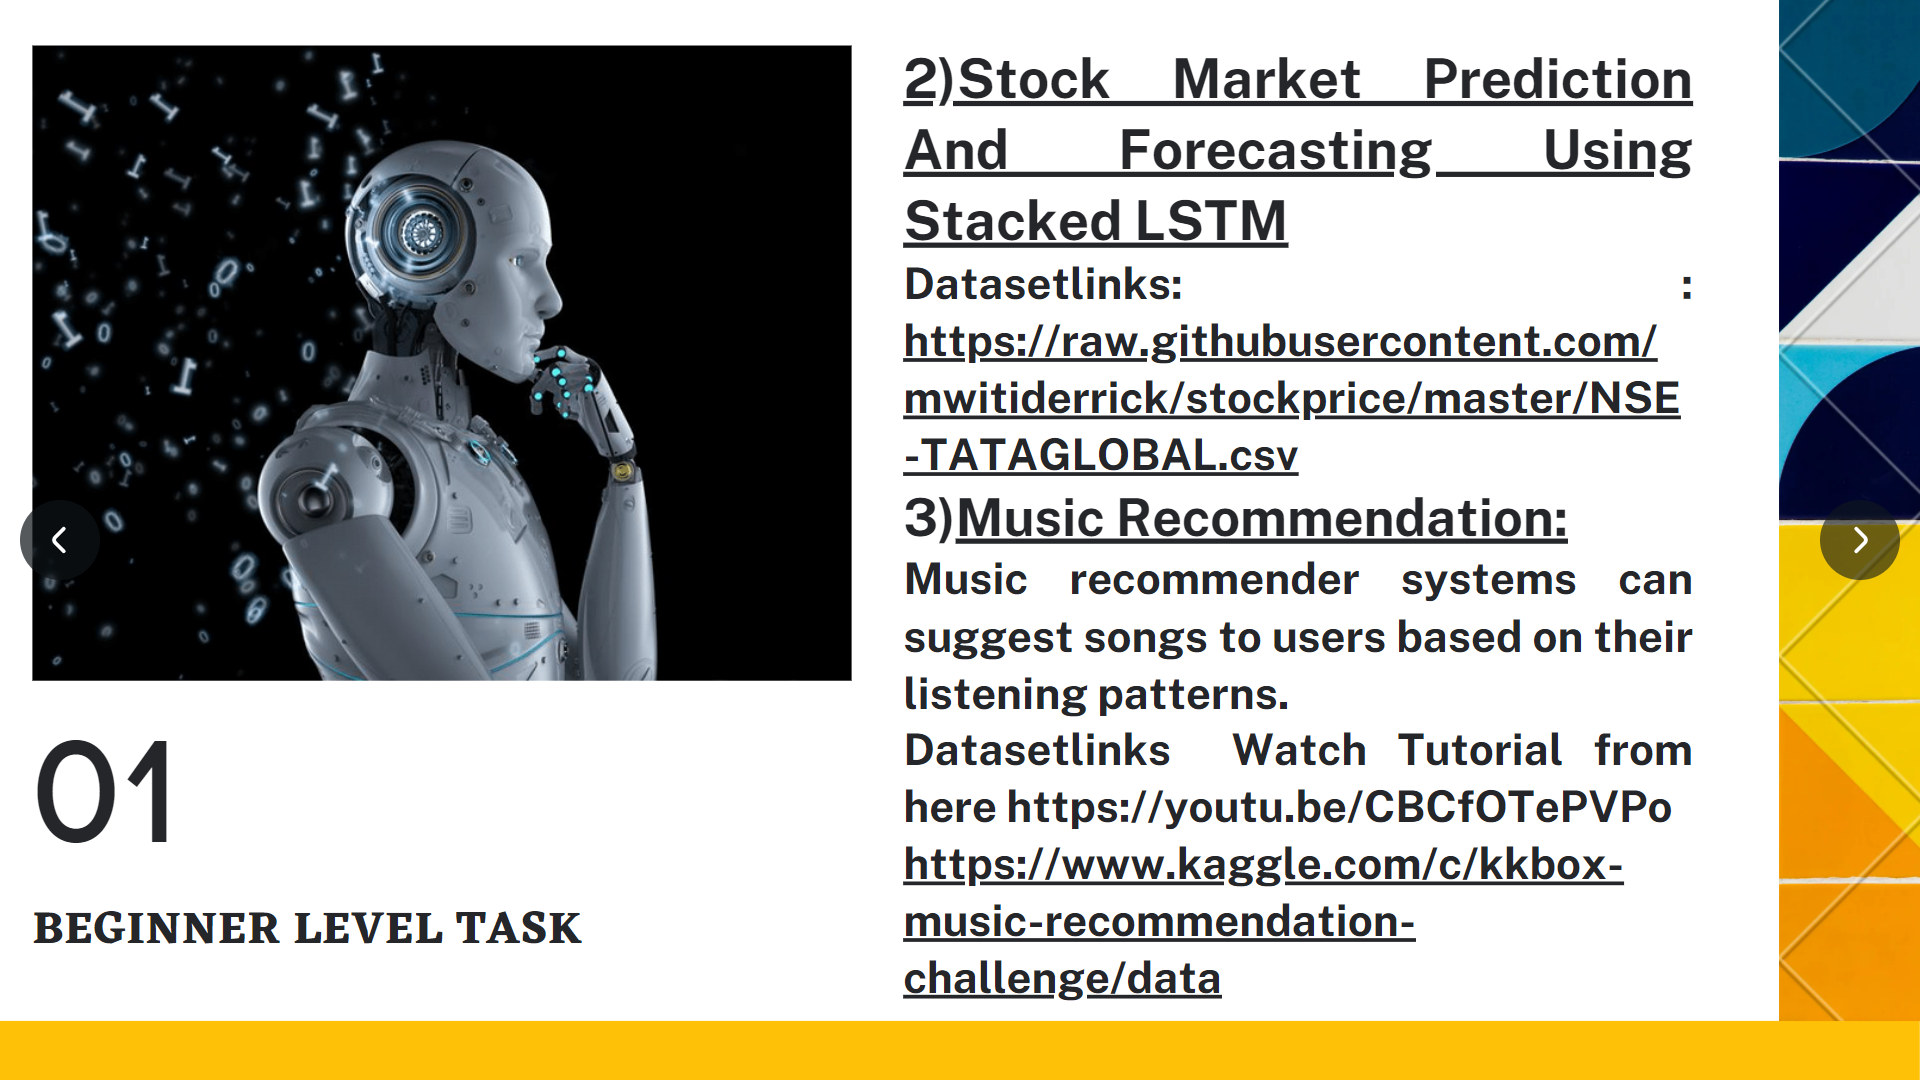

## **Task Details : Music recommender system can suggest songs to users based on their listening pattern.**

## **AUTHOR : Nupur Godse**

## **Dataset:**

https://www.canva.com/link?target=https%3A%2F%2Fwww.kaggle.com%2Fc%2Fkkbox-music-recommendation-challenge%2Fdata&design=DAEjrwWV35w

## **Import required modules**

In [ ]:
import pandas as pd
import numpy as np
import Recommenders as Recommenders

## **Loading the dataset**

In [ ]:
df_song_1 = pd.read_csv('/content/triplets_file.csv')
df_song_1.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [ ]:
len(df_song_1)

2000000

In [ ]:
df_song_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 3 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   user_id       object
 1   song_id       object
 2   listen_count  int64 
dtypes: int64(1), object(2)
memory usage: 45.8+ MB


In [ ]:
df_song_1.isna().sum()

user_id         0
song_id         0
listen_count    0
dtype: int64

In [ ]:
df_song_2 = pd.read_csv('/content/song_data.csv')
df_song_2.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [ ]:
len(df_song_2)

1000000

In [ ]:
df_song_2.isna().sum()

song_id         0
title          15
release         5
artist_name     0
year            0
dtype: int64

## **Data Preprocessing**

## **combine both data**

In [ ]:
df_song = pd.merge(df_song_1,df_song_2.drop_duplicates(['song_id']),how ='left')
df_song.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [ ]:
len(df_song)

2000000

## **creating new feature combining title and artist name**

In [ ]:
df_song['song_details'] = df_song['title']+' - '+df_song['artist_name']
df_song.head()

,user_id,song_id,listen_count,title,release,artist_name,year,song_details
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly - Foo Fighters


## **cummulative sum of listen count of the songs**

In [ ]:
grouped_song_details = df_song.groupby(['song_details']).agg({'listen_count':'count'})
grouped_song_details.head()

,listen_count
song_details,
#!*@ You Tonight [Featuring R. Kelly] (Explicit Album Version) - The Notorious B.I.G.,78
#40 - DAVE MATTHEWS BAND,338
& Down - Boys Noize,373
' Cello Song - Nick Drake,103
'97 Bonnie & Clyde - Eminem,93


In [ ]:
grouped_sum_details = grouped_song_details['listen_count'].sum()
grouped_song_details['percentage'] = (grouped_song_details['listen_count'] / grouped_sum_details ) * 100
grouped_song_details.sort_values(['listen_count', 'song_details'], ascending= [0,1])

,listen_count,percentage
song_details,,
Sehr kosmisch - Harmonia,8277,0.41385
Undo - Björk,7032,0.35160
Dog Days Are Over (Radio Edit) - Florence + The Machine,6949,0.34745
You're The One - Dwight Yoakam,6412,0.32060
Revelry - Kings Of Leon,6145,0.30725
...,...,...
Historia Del Portero - Ricardo Arjona,51,0.00255
Scared - Three Days Grace,51,0.00255
Don´t Leave Me Now - Amparanoia,50,0.00250


In [ ]:
PR = Recommenders.popularity_recommender_py()

In [ ]:

PR.create(df_song, 'user_id', 'song_details')

## **display the top 10 popular songs**

In [ ]:
PR.recommend(df_song['user_id'][6])

,user_id,song_details,score,Rank
7127,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Sehr kosmisch - Harmonia,8277,1.0
9084,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Undo - Björk,7032,2.0
2068,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Dog Days Are Over (Radio Edit) - Florence + Th...,6949,3.0
9880,b80344d063b5ccb3212f76538f3d9e43d87dca9e,You're The One - Dwight Yoakam,6412,4.0
6774,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Revelry - Kings Of Leon,6145,5.0
7115,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Secrets - OneRepublic,5841,6.0
3613,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Horn Concerto No. 4 in E flat K495: II. Romanc...,5385,7.0
2717,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Fireflies - Charttraxx Karaoke,4795,8.0
3485,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Hey_ Soul Sister - Train,4758,9.0
8847,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Tive Sim - Cartola,4548,10.0


In [ ]:
PR.recommend(df_song['user_id'][17])

,user_id,song_details,score,Rank
7127,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Sehr kosmisch - Harmonia,8277,1.0
9084,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Undo - Björk,7032,2.0
2068,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Dog Days Are Over (Radio Edit) - Florence + Th...,6949,3.0
9880,b80344d063b5ccb3212f76538f3d9e43d87dca9e,You're The One - Dwight Yoakam,6412,4.0
6774,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Revelry - Kings Of Leon,6145,5.0
7115,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Secrets - OneRepublic,5841,6.0
3613,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Horn Concerto No. 4 in E flat K495: II. Romanc...,5385,7.0
2717,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Fireflies - Charttraxx Karaoke,4795,8.0
3485,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Hey_ Soul Sister - Train,4758,9.0
8847,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Tive Sim - Cartola,4548,10.0


In [ ]:
IR = Recommenders.item_similarity_recommender_py()
IR.create(df_song, 'user_id', 'song_details')

In [ ]:
user_fav_items = IR.get_user_items(df_song['user_id'][10])

## **display user songs history**

In [ ]:
for user_fav_item in user_fav_items:
    print(user_fav_item)

The Cove - Jack Johnson
Entre Dos Aguas - Paco De Lucia
Stronger - Kanye West
Constellations - Jack Johnson
Learn To Fly - Foo Fighters
Apuesta Por El Rock 'N' Roll - Héroes del Silencio
Paper Gangsta - Lady GaGa
Stacked Actors - Foo Fighters
Sehr kosmisch - Harmonia
Heaven's gonna burn your eyes - Thievery Corporation feat. Emiliana Torrini
Let It Be Sung - Jack Johnson / Matt Costa / Zach Gill / Dan Lebowitz / Steve Adams
I'll Be Missing You (Featuring Faith Evans & 112)(Album Version) - Puff Daddy
Love Shack - The B-52's
Clarity - John Mayer
I?'m A Steady Rollin? Man - Robert Johnson
The Old Saloon - The Lonely Island
Behind The Sea [Live In Chicago] - Panic At The Disco
Champion - Kanye West
Breakout - Foo Fighters
Ragged Wood - Fleet Foxes
Mykonos - Fleet Foxes
Country Road - Jack Johnson / Paula Fuga
Oh No - Andrew Bird
Love Song For No One - John Mayer
Jewels And Gold - Angus & Julia Stone
Warning - Incubus
83 - John Mayer
Neon - John Mayer
The Middle - Jimmy Eat World
High and 

In [ ]:
user_fav_items = IR.get_user_items(df_song['user_id'][100])

## **display user songs history**

In [ ]:
for user_fav_item in user_fav_items:
    print(user_fav_item)

Undo - Björk
Dog Days Are Over (Radio Edit) - Florence + The Machine
High Life - Daft Punk
You're The One - Dwight Yoakam
Where Did You Sleep Last Night - Nirvana
Come As You Are - Nirvana
Hey_ Soul Sister - Train
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile) - Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner
Rhyme & Reason - DAVE MATTHEWS BAND
Sehr kosmisch - Harmonia
Someone Else's Arms - Mae
Cry For Help (Album Version) - Shinedown
Lady In Black - Ensiferum
For You (Amended/Radio Edit LP) - Staind
Fireflies - Charttraxx Karaoke
Secrets - OneRepublic
Esta Es Para Hacerte Féliz - Jorge Gonzalez
Revelry - Kings Of Leon
Marry Me - Train
OMG - Usher featuring will.i.am
Drop The World - Lil Wayne / Eminem
Ain't Misbehavin - Sam Cooke
Blow Me Away - Breaking Benjamin
Use Somebody - Kings Of Leon
Corn Bread - DAVE MATTHEWS BAND


## **Give song recommendation for that user**

In [ ]:

IR.recommend(df_song['user_id'][100])

No. of unique songs for the user: 25
no. of unique songs in the training set: 9953
Non zero values in cooccurence_matrix :191189


,user_id,song,score,rank
0,e006b1a48f466bf59feefed32bec6494495a4436,Pursuit Of Happiness (nightmare) - Kid Cudi / ...,0.085445,1
1,e006b1a48f466bf59feefed32bec6494495a4436,Lucky (Album Version) - Jason Mraz & Colbie Ca...,0.082186,2
2,e006b1a48f466bf59feefed32bec6494495a4436,Somebody To Love - Justin Bieber,0.081300,3
3,e006b1a48f466bf59feefed32bec6494495a4436,The Only Exception (Album Version) - Paramore,0.079397,4
4,e006b1a48f466bf59feefed32bec6494495a4436,The Scientist - Coldplay,0.076167,5
5,e006b1a48f466bf59feefed32bec6494495a4436,Bleed It Out [Live At Milton Keynes] - Linkin ...,0.075127,6
6,e006b1a48f466bf59feefed32bec6494495a4436,Billionaire [feat. Bruno Mars] (Explicit Albu...,0.071405,7
7,e006b1a48f466bf59feefed32bec6494495a4436,Love Story - Taylor Swift,0.069411,8
8,e006b1a48f466bf59feefed32bec6494495a4436,Bulletproof - La Roux,0.068273,9
9,e006b1a48f466bf59feefed32bec6494495a4436,Tive Sim - Cartola,0.067126,10


## **Give related songs based on the words**

In [ ]:

IR.get_similar_items(['Somebody To Love - Justin Bieber'])

no. of unique songs in the training set: 9953
Non zero values in cooccurence_matrix :9560


,user_id,song,score,rank
0,,U Smile - Justin Bieber,0.272999,1
1,,Eenie Meenie - Sean Kingston and Justin Bieber,0.249307,2
2,,Love Me - Justin Bieber,0.223391,3
3,,OMG - Usher featuring will.i.am,0.203870,4
4,,Marry Me - Train,0.200794,5
5,,One Time - Justin Bieber,0.200645,6
6,,Lucky (Album Version) - Jason Mraz & Colbie Ca...,0.183409,7
7,,Pursuit Of Happiness (nightmare) - Kid Cudi / ...,0.179563,8
8,,One Less Lonely Girl - Justin Bieber,0.179026,9
9,,Hey_ Soul Sister - Train,0.174150,10


In [ ]:

IR.get_similar_items(['The Scientist - Coldplay'])

no. of unique songs in the training set: 9953
Non zero values in cooccurence_matrix :9898


,user_id,song,score,rank
0,,Clocks - Coldplay,0.311644,1
1,,Yellow - Coldplay,0.252474,2
2,,Fix You - Coldplay,0.250946,3
3,,Lucky (Album Version) - Jason Mraz & Colbie Ca...,0.193009,4
4,,Use Somebody - Kings Of Leon,0.190731,5
5,,Marry Me - Train,0.182174,6
6,,Pursuit Of Happiness (nightmare) - Kid Cudi / ...,0.175526,7
7,,Hey_ Soul Sister - Train,0.169279,8
8,,Secrets - OneRepublic,0.169162,9
9,,Shiver - Coldplay,0.168509,10


## Succesfully got music recommendation and our aim is also fulfilled .